<a href="https://colab.research.google.com/github/Chushion/Prac-class/blob/main/Personal_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Dacon] 컴퓨터 비전 학습 경진대회

< 주요 참고 Model > \
Private 3위, Public 점수: 0.95098, CNN model \
by 자몽허니블랙티 (2020.09.16) \
https://dacon.io/competitions/official/235626/codeshare/1682?page=1&dtype=recent


---


< 추가 참고 Baseline > \
Introduction to CNN Keras \
by Yassine Ghouzam, PhD \
https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6

[Keras] CNN 이미지 분류 실습 : 손글씨 이미지 분류 \
by 커딩왕 \
https://chancoding.tistory.com/92

#### 해당 대회를 선택하게 된 이유

어떤 대회를 선택할지 고민하던 중


---
[Dacon] 태양광 발전량 예측 AI 경진대회

Stacking Quantile Regression 태양광 발전량 \
by 고라파덕 (2021.02.01) 

from https://dacon.io/competitions/official/235680/codeshare/2366?page=1&dtype=recent

---

을 발견하게 되었다. 

이 과정에서 쓰인 모델들이 매력적으로 다가왔고, 하기와 같이 모델들을 공부하다 보니, CNN을 사용해보고 싶다는 생각이 들었다.

이에, 이미지를 분류하는 대회를 찾았고, 컴퓨터 비전 경진대회에서 CNN 모델을 사용해보는 것이 좋겠다는 생각을 했다.


---

tensorflow를 활용하여 모델을 4가지 기법, quantile별로, 예측 일별로 총 4 * 9 * 2=72개 생성했습니다.

모델 선정은 가장 기초적인 MLP,

인접 데이터와의 상관관계를 학습하기 유리한 CNN,

시계열 학습에 적합한 LSTM

그리고 CNN과 LSTM의 장점을 합친 CNNLSTM을 활용했습니다.

이때 day7 과 day8을 분리하여 모델링한 이유는 day7대비 day8의 불확실성이 높을것으로 판단하고 이에 따른 필요한 feature extraction이 다를것으로 예상했기 때문입니다.


---


이 부분에서 익숙하지 않은 모델들이 많이 등장하였다.
때문에, 이에 대해서 학습해보았다.

MLP
: MLP는 Multi-Layer Perceptron(다층 퍼셉트론)의 준말이다. 퍼셉트론의 활성 함수를 개선하여, 퍼셉트론을 발전시킨 인공신경망을 아달라인이라고 부른다.
퍼셉트론과 아달라인은 데이터의 입력층과 출력층만 있는 구조이다. 이러한 구조를 갖는 퍼셉트론을 단층 퍼셉트론이라고 한다. 단층 퍼셉트론은 비선형적으로 분리되는 데이터에 대해서는 제대로 된 학습이 불가능하다는 단점이 있다.
이를 극복하기 위하여, 입력층과 출력층 사이에 하나 이상의 중간층을 두어 비선형적으로 분리되는 데이터에 대해서도 학습이 가능하도록 한 것이 다층 퍼셉트론이다.

CNN
: CNN은 Convolutional Neural Network의 준말이다. 이는, DNN (Deep Neural Network)에서 이미지나 영상과 같은 데이터를 처리할 때 발생하는 문제점을 보완한 방법이다. DNN은 기본적으로 1차원의 데이터를 사용하는데, 480 * 480 같은 형태로 표현되는 이미지는 하나의 row로 (1차원) 구성되지 않는다. (만약 이를 1차원으로 표현한다고 하더라도 매우 큰 Loss를 갖게 된다.) CNN에서는 이미지의 한 픽셀과 주변 픽셀들의 연관관계를 유지시키며 학습시키는 것을 목표로 한다. 이러한 방법으로 DNN의 단점을 극복한 것이다.
해당 실습에서는 인접 데이터와의 상관관계 학습을 위해 해당 모델을 사용하는데, 이러한 이론적 배경에서 등장한 것 같다.

LSTM
: LSTM은 Long Short-Term Momory Model의 준말이다. 이는 Recurrent Neural Networks(RNN)의 일종이다. RNN은 히든 노드가 방향을 가진 엣지로 연결되어 순환구조를 이루는 인공신경망의 한 종류이다. 음성, 문자 등 순차적으로 등장하는 데이터 처리에 적합한 모델이다. 이는 시퀀스 길이에 상관없이 Input과 Output을 받아들일 수 있는 네트워크 구조이기에 필요에 따라 다양하고 유연하게 구조를 만들 수 있다는 장점이 있다. 하지만, RNN은 관련 정보와 그 정보를 사용하는 지점 사이 거리가 멀 경우 역전파 시에 Gradient(경사)가 점차 줄어들어 학습 능력이 크게 저하되는 단점이 존재한다. (Vanishing Gradient Problem)
이러한 문제를 극복하기 위해서 고안된 것이 LSTM이다. RNN의 히든 state에 cell-state를 추가한 것이다. 해당 실습에서는 시계열적 분석을 위해 순차적으로 등장하는 데이터 처리에 적합한 모델이라는 점에 더해 단점이 보완된 LSTM모델을 사용한 것으로 보인다.

이론적인 부분은 이정도만 해두고, 이어서 진행해보자.

# 0. 환경설정

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)


from keras.preprocessing.image import ImageDataGenerator
from numpy import expand_dims
from numpy import ndarray
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import itertools
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import *
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf


sns.set(style='white', context='notebook', palette='deep')

각종 Library를 불러왔다. 

하지만 이 노트는 Colab에서 작성하는 것이기 때문에 \
데이터를 구글 드라이브에서 불러오기 위한 Library가 하나 더 필요하다.

In [206]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 1. 데이터 불러오기

데이터를 불러오고, \

데이터의 구조를 알아보기로 했다.

In [207]:
train = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/input/CV/train.csv')
test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/input/CV/test.csv')
sub = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/input/CV/submission.csv')

In [208]:
print(train.shape)
train.head()

(2048, 787)


,id,digit,letter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,4,4,3,0,4,3,3,3,4,4,0,0,1,1,3,4,0,4,2,0,4,0,1,3,1,0,4,1,1,3,...,4,3,4,1,3,0,0,1,3,3,3,0,3,2,2,1,0,1,0,0,3,0,0,4,2,0,3,4,1,1,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,1,4,2,0,3,4,0,0,2,3,4,0,3,4,3,0,2,2,1,4,2,3,3,4,1,2,4,2,0,3,...,4,2,3,0,0,0,0,4,3,2,2,4,2,1,1,1,3,3,1,2,4,4,4,2,2,4,4,0,4,2,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,0,2,1,3,2,2,2,4,1,1,4,1,0,1,3,4,2,2,2,4,1,1,2,0,3,0,2,3,4,0,...,3,0,4,0,3,0,2,0,1,4,2,3,4,4,4,0,2,0,4,4,1,3,0,3,2,0,2,3,0,2,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,3,4,3,1,0,3,2,2,0,3,4,1,0,4,1,2,2,3,2,2,0,2,0,3,0,3,2,4,0,0,...,0,3,0,1,4,1,3,1,2,1,1,1,2,2,2,4,3,4,3,0,4,1,2,4,1,4,0,1,0,4,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,4,2,4,2,1,4,1,1,4,4,0,2,3,4,4,3,3,3,3,4,1,0,3,0,3,0,0,0,1,1,...,2,1,3,2,1,4,2,3,2,2,1,0,4,2,2,1,2,1,0,3,2,2,2,2,1,4,2,1,2,1,4,4,3,2,1,3,4,3,1,2


In [209]:
print(test.shape)
test.head()

(20480, 786)


,id,letter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,2049,L,0,4,0,2,4,2,3,1,0,0,1,0,1,3,4,4,0,0,2,4,4,1,3,3,2,2,4,1,0,1,2,2,1,2,2,1,4,0,...,1,3,1,1,3,3,4,1,3,1,2,4,1,2,0,3,1,2,4,0,2,1,2,4,1,1,3,2,1,0,2,0,4,2,2,4,3,4,1,4
1,2050,C,4,1,4,0,1,1,0,2,2,1,0,3,0,1,1,4,1,2,0,2,2,0,4,3,4,0,2,4,4,2,1,2,4,0,4,2,0,2,...,3,4,2,6,2,2,0,1,2,4,1,1,3,3,2,3,4,2,2,4,3,1,3,3,3,1,3,4,4,2,0,3,2,4,2,4,2,2,1,2
2,2051,S,0,4,0,1,3,2,3,0,2,1,2,0,1,0,3,0,1,4,3,0,0,3,0,4,1,0,3,2,0,4,1,2,0,0,1,3,0,2,...,0,4,4,3,4,1,4,2,3,4,1,2,0,2,2,3,3,1,1,4,1,2,4,0,0,0,0,2,3,2,1,3,2,0,3,2,3,0,1,4
3,2052,K,2,1,3,3,3,4,3,0,0,2,3,2,3,4,4,4,0,1,4,2,2,0,1,4,3,1,3,0,2,3,2,4,3,1,1,4,0,0,...,0,4,1,1,2,3,2,3,3,0,0,1,3,3,0,2,0,0,2,3,2,2,3,1,1,2,4,0,1,2,3,0,3,2,4,1,0,4,4,4
4,2053,W,1,0,1,1,2,2,1,4,1,1,4,3,4,1,2,1,4,3,3,4,0,4,4,2,0,0,0,0,3,4,0,1,4,2,2,2,1,4,...,4,1,3,2,1,2,1,4,4,1,2,3,2,4,2,1,4,3,4,3,0,1,0,1,1,2,1,1,0,2,4,3,1,4,0,2,1,2,3,4


# 2. EDA & 데이터 전처리

EDA = Exploratory Data Analysis

- 수집한 데이터를 다양한 각도에서 관찰하고 이해하는 과정이다.
- 즉, 데이터를 분석하기 전 그래프나 통계적인 방법으로 자료를 직관적으로 이해하는 것이다.


#### Check the data

형식적인 과정이지만, 이상치나 결측치가 없는지 check해보는 과정을 거칠 것이다.

In [210]:
train.isnull().any().describe()

count       787
unique        1
top       False
freq        787
dtype: object

In [211]:
test.isnull().any().describe()

count       786
unique        1
top       False
freq        786
dtype: object


label ('digit')의 분포를 확인한다.

이를 확인하기 위해서 그래프를 그린다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


2    233
5    225
6    212
4    207
3    205
1    202
9    197
7    194
0    191
8    182
Name: digit, dtype: int64

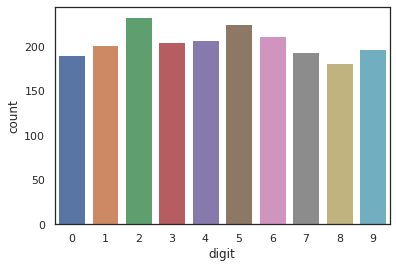

In [212]:
Y_train = train["digit"]

g = sns.countplot(Y_train)
Y_train.value_counts()

10개의 digit에 대해서 similar한 것을 확인할 수 있다.


이제 필요없는 column을 정리하여 보자.

In [213]:
X_train = train.drop(labels = ['id', 'digit', 'letter'], axis = 1) 
X_test = test.drop(labels = ['id', 'letter'], axis = 1)

또한, padas의 dataframe을 numpy array로 변환하자

In [214]:
X_train = X_train.values
X_test = X_test.values

Sample을 출력해보자.

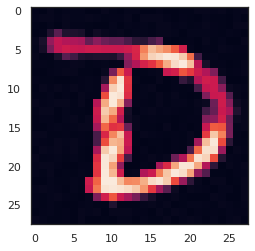

In [215]:
plt.imshow(X_train[100].reshape(28,28))

#### Reshape
Train and Test images는 28px * 28px이기 때문에, 이를 reshape 해준다. 


In [216]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

#### Normalization

CNN에서는 [0..1] 데이터 보다 [0..255] 데이터의 연산이 빠르기 때문에 이에 맞춰 정규화한다.

In [217]:
X_train = X_train/255.0
X_test = X_test/255.0

#### Label Encoding

0~9로 이루어진 10개의 digit을 One-hot Encoding 해주었다.

In [218]:
Y_train = to_categorical(Y_train, num_classes = 10)

#### Split Training and Validation set

In [219]:
random_seed = 2

In [220]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state = random_seed)

다시 sample을 출력해보자.

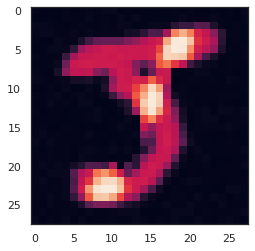

In [221]:
g = plt.imshow(X_train[0][:,:,0])

# 3. Modeling

Model을 Define해보자. \
상술한 바와 같이, Model은 CNN모델을 사용할 것이다.

In [222]:
model = Sequential()

model.add(Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
    
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32,(5,5),activation='relu',padding='same')) 
model.add(BatchNormalization())
model.add(Conv2D(32,(5,5),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32,(5,5),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((3,3)))
model.add(Dropout(0.3))
    
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,(5,5),activation='relu',padding='same')) 
model.add(BatchNormalization())
model.add(MaxPooling2D((3,3)))
model.add(Dropout(0.3))
    
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(10,activation='softmax'))
    

#### Set the Optimizer

Optimizer를 설정하자.
대회 코드에서 사용한 Adam을 사용한다.

In [256]:
optimizer=Adam(lr=0.002,epsilon=None)

#### Compile the file

file을 compile 한다

원래 대회 코드와 optimizer가 다른 것 빼고는 차이가 없다. 


In [247]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['acc'])

#### Set a Learning Rate Annealer 
Learning Rate Annealer를 설정하자.

In [249]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

#### Set a epochs & batch size

Introduction to CNN Keras의 저자는,

본인의 대상 파일에 대하여 해당 코드를 설계할 당시 30번의 epochs로 0.9967이라는 정확도를 얻어냈다.

때문에, 비교하기 위하여 같은 횟수인 30을 설정하려 했으나,
데이터가 달라  모델이 불확실할 것이 확실하기 때문에 100회로 설정한다.

In [250]:
epochs = 100
batch_size = 86

#### Data augmentation
저자는 overfitting을 방지하기 위한 data augmentation이 없는 경우에 0.98114의 정확도를 얻어냈고, data augementation을 추가한 뒤 0.99286의 정확도를 얻어냈으나,

이를 본 데이터에 적용했을 시 data augementation을 추가하면 정확도가 내려가는 것을 알 수 있었다.

하지만 이에 대한 문제점을 확실하게 파악할 수 없었기에 넘어가도록 한다.



In [251]:
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
         validation_data = (X_val, Y_val), verbose = 2)

Epoch 1/100
22/22 - 2s - loss: 0.1171 - acc: 0.9664 - val_loss: 0.3343 - val_acc: 0.8878
Epoch 2/100
22/22 - 0s - loss: 0.1298 - acc: 0.9620 - val_loss: 1.9101 - val_acc: 0.6049
Epoch 3/100
22/22 - 0s - loss: 0.1602 - acc: 0.9501 - val_loss: 0.5861 - val_acc: 0.8488
Epoch 4/100
22/22 - 0s - loss: 0.1464 - acc: 0.9495 - val_loss: 0.5468 - val_acc: 0.8537
Epoch 5/100
22/22 - 0s - loss: 0.1691 - acc: 0.9457 - val_loss: 0.5480 - val_acc: 0.8439
Epoch 6/100
22/22 - 0s - loss: 0.1578 - acc: 0.9517 - val_loss: 0.4380 - val_acc: 0.8634
Epoch 7/100
22/22 - 0s - loss: 0.0999 - acc: 0.9658 - val_loss: 0.2995 - val_acc: 0.9073
Epoch 8/100
22/22 - 0s - loss: 0.0828 - acc: 0.9723 - val_loss: 0.3206 - val_acc: 0.8927
Epoch 9/100
22/22 - 0s - loss: 0.0805 - acc: 0.9734 - val_loss: 0.3097 - val_acc: 0.9122
Epoch 10/100
22/22 - 0s - loss: 0.0791 - acc: 0.9707 - val_loss: 0.3218 - val_acc: 0.9122
Epoch 11/100
22/22 - 0s - loss: 0.1080 - acc: 0.9647 - val_loss: 0.3365 - val_acc: 0.8976
Epoch 12/100
22/22 

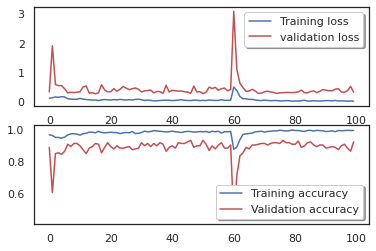

In [252]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [253]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [254]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
21/21 - 1s - loss: 1.3277 - acc: 0.7285 - val_loss: 0.8482 - val_acc: 0.7610
Epoch 2/100
21/21 - 1s - loss: 1.0546 - acc: 0.7285 - val_loss: 0.6272 - val_acc: 0.8244
Epoch 3/100
21/21 - 1s - loss: 0.7048 - acc: 0.7735 - val_loss: 0.4537 - val_acc: 0.8537
Epoch 4/100
21/21 - 1s - loss: 0.5918 - acc: 0.8093 - val_loss: 0.3198 - val_acc: 0.9122
Epoch 5/100
21/21 - 1s - loss: 0.5598 - acc: 0.8150 - val_loss: 0.2506 - val_acc: 0.9122
Epoch 6/100
21/21 - 1s - loss: 0.5304 - acc: 0.8344 - val_loss: 0.2385 - val_acc: 0.9171
Epoch 7/100
21/21 - 1s - loss: 0.5057 - acc: 0.8355 - val_loss: 0.2971 - val_acc: 0.9024
Epoch 8/100
21/21 - 1s - loss: 0.4679 - acc: 0.8395 - val_loss: 0.3400 - val_acc: 0.8780
Epoch 9/100
21/21 - 1s - loss: 0.4590 - acc: 0.8503 - val_loss: 0.3490 - val_acc: 0.8585

Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0010000000474974513.
Epoch 10/100
21/21 - 1s - loss: 0.4717 - acc: 0.8492 - val_loss: 0.2911 - val_acc: 0.9171
Epoch 11/100
21/21 - 1s - lo

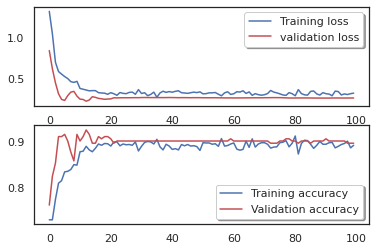

In [255]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

첫 번째 시도에서 상기와 같은 결과를 얻었다.

다만, optimizer를 변경하면 어떻게 달라질지 궁금했다.

때문에, 
Introduction to CNN Keras를 참고해, optimizer를 RMSprop로 변경한다.

다른 설정은 동일하기에, optimizer이후의 실행 셀만 가져와서 다시 실행해본다.

In [257]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [258]:
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
         validation_data = (X_val, Y_val), verbose = 2)

Epoch 1/100
22/22 - 0s - loss: 0.0784 - acc: 0.9848 - val_loss: 0.2333 - val_acc: 0.9122
Epoch 2/100
22/22 - 0s - loss: 0.0874 - acc: 0.9805 - val_loss: 0.2191 - val_acc: 0.9268
Epoch 3/100
22/22 - 0s - loss: 0.0882 - acc: 0.9772 - val_loss: 0.2119 - val_acc: 0.9317
Epoch 4/100
22/22 - 0s - loss: 0.0865 - acc: 0.9799 - val_loss: 0.2077 - val_acc: 0.9268
Epoch 5/100
22/22 - 0s - loss: 0.0917 - acc: 0.9821 - val_loss: 0.2052 - val_acc: 0.9268
Epoch 6/100
22/22 - 0s - loss: 0.0876 - acc: 0.9788 - val_loss: 0.2039 - val_acc: 0.9268
Epoch 7/100
22/22 - 0s - loss: 0.0872 - acc: 0.9783 - val_loss: 0.2033 - val_acc: 0.9268
Epoch 8/100
22/22 - 0s - loss: 0.0834 - acc: 0.9799 - val_loss: 0.2038 - val_acc: 0.9317
Epoch 9/100
22/22 - 0s - loss: 0.0847 - acc: 0.9821 - val_loss: 0.2037 - val_acc: 0.9268
Epoch 10/100
22/22 - 0s - loss: 0.0741 - acc: 0.9870 - val_loss: 0.2037 - val_acc: 0.9268
Epoch 11/100
22/22 - 0s - loss: 0.0834 - acc: 0.9832 - val_loss: 0.2036 - val_acc: 0.9268
Epoch 12/100
22/22 

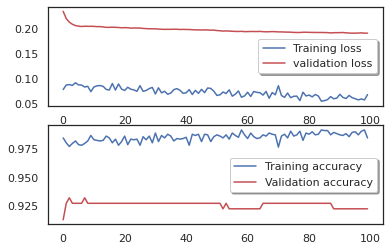

In [259]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [261]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [262]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
21/21 - 1s - loss: 0.3469 - acc: 0.8936 - val_loss: 0.1867 - val_acc: 0.9268
Epoch 2/100
21/21 - 1s - loss: 0.3078 - acc: 0.9037 - val_loss: 0.1832 - val_acc: 0.9220
Epoch 3/100
21/21 - 1s - loss: 0.3390 - acc: 0.8907 - val_loss: 0.1830 - val_acc: 0.9220
Epoch 4/100
21/21 - 1s - loss: 0.3238 - acc: 0.8958 - val_loss: 0.1852 - val_acc: 0.9220
Epoch 5/100
21/21 - 1s - loss: 0.3143 - acc: 0.9021 - val_loss: 0.1893 - val_acc: 0.9122
Epoch 6/100
21/21 - 1s - loss: 0.3260 - acc: 0.9004 - val_loss: 0.1943 - val_acc: 0.9122
Epoch 7/100
21/21 - 1s - loss: 0.3344 - acc: 0.8958 - val_loss: 0.1993 - val_acc: 0.9122
Epoch 8/100
21/21 - 1s - loss: 0.3219 - acc: 0.8958 - val_loss: 0.2048 - val_acc: 0.9171
Epoch 9/100
21/21 - 1s - loss: 0.3151 - acc: 0.8998 - val_loss: 0.2083 - val_acc: 0.9220
Epoch 10/100
21/21 - 1s - loss: 0.3369 - acc: 0.8924 - val_loss: 0.2129 - val_acc: 0.9171
Epoch 11/100
21/21 - 1s - loss: 0.3451 - acc: 0.8845 - val_loss: 0.2160 - val_acc: 0.9220
Epoch 12/100
21/21 

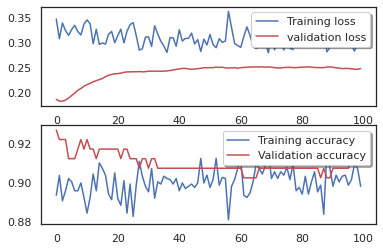

In [263]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

#### Look at Confusion Matrix
Confusion Matrix를 출력해보았다.

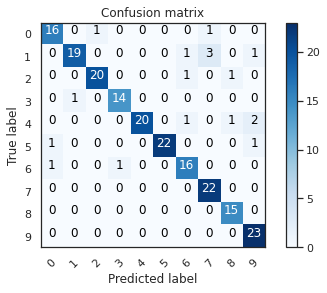

In [264]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 


#### Display some error results

Error results를 살펴보았다.

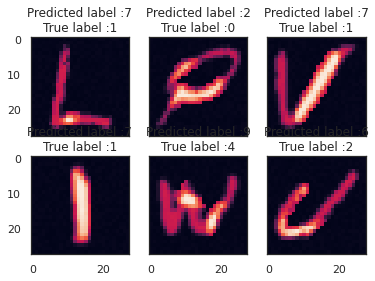

In [265]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)


#### Predict Results

마지막으로 결과를 출력하고, 실습을 종료한다.

In [266]:
# predict results
results = model.predict(X_test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

results

0        6
1        9
2        8
3        0
4        3
        ..
20475    4
20476    1
20477    6
20478    8
20479    0
Name: Label, Length: 20480, dtype: int64